In [1]:
# Stack overflow survey analysis

Each year,Stack Overflow ask the developer community about everything from their favorite technologies to their job preferences.in 2022 over 60,000 developers responded to our annual survey about how they learn and level up, which tools they're using, and which ones they want.

In [2]:
import pandas as pd

In [3]:
survey_raw_df = pd.read_csv('survey_results_public.csv')
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64461 responses to 61 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: Column and QuestionText.

In [5]:
schema_raw_df=pd.read_csv('survey_results_schema.csv')
schema_raw_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [6]:
schema_raw_df.set_index('Column', inplace= True)
schema_raw_df

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [7]:
schema_raw_df.loc['YearsCode','QuestionText']

'Including any education, how many years have you been coding in total?'

# Data processing and cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

* Demographics of the survey respondents and the global programming community
* Distribution of programming skills, experience, and preferences
* Employment-related information, preferences, and opinions

In [8]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [9]:
len(selected_columns)

20

In [10]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
survey_df.shape

(64461, 20)

## Summary of dataset

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [13]:
schema_raw_df.loc['Age1stCode','QuestionText']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [14]:
survey_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [15]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [16]:
#Statistical properties of dataset
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [17]:
filt1=(survey_df['Age'] < 10)                           #ignore entries where the value for the column is less than 10 and greater than 100.
survey_df.drop(index= survey_df[filt1].index , inplace=True)

In [18]:
filt2=(survey_df['Age'] > 100)
survey_df.drop(index= survey_df[filt2].index , inplace=True)

In [19]:
filt3= (survey_df['WorkWeekHrs'] > 140)                     #ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).
survey_df.drop(index= survey_df[filt3].index , inplace=True)

In [20]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [21]:
import numpy as np

In [22]:
survey_df.where(~(survey_df['Gender'].str.contains(';', na=False)), np.nan, inplace=True)

In [23]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [24]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
47789,Belgium,41.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",Yes,24.0,17.0,9.0,Python;R,JavaScript;Julia;Python,Once a decade,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Data scientist or machine learning specialist,40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Somewhat important
35853,Germany,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,7.0,15.0,4.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Slightly satisfied,Industry that I’d be working in;Remote work op...,Sometimes: 1-2 days per month but less than we...,Somewhat important
16045,United States,51.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,36.0,30.0,C++;HTML/CSS;JavaScript,Python;Ruby,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, back-end;Developer, deskto...",40.0,Slightly dissatisfied,"Industry that I’d be working in;Languages, fra...",Rarely: 1-2 days per year or less,Very important
19321,Canada,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,13.0,18.0,11.0,Bash/Shell/PowerShell;C#;C++;Haskell,Bash/Shell/PowerShell;C#;Haskell,Once a year,Do other work and come back later,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Remote work o...,Never,Somewhat important
42167,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,8.0,30.0,20.0,C#;PHP;SQL;VBA,C#;SQL,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end;Dev...",NaN,Very satisfied,NaN,NaN,Critically important
45785,Bangladesh,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,10.0,1.0,PHP;Python,Python;R;Rust,NaN,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,Academic researcher;Data scientist or machine ...,40.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Never,Very important
62215,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python;SQL;Swift;Type...,C++;Go;Java;Python;Rust;Swift,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
58305,India,28.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,8.0,5.0,JavaScript;TypeScript,Python,Once a year,NaN,Employed full-time,"Developer, back-end;Developer, full-stack",47.5,Slightly satisfied,Diversity of the company or organization;Flex ...,Sometimes: 1-2 days per month but less than we...,Fairly important
29667,United Kingdom,54.0,Man,NaN,"Computer science, computer engineering, or sof...",No,14.0,39.0,35.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,Go;Python;R;Rust;SQL;TypeScript,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Database administrator;Developer, back-end;Dev...",65.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Somewhat important
49902,Poland,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,Yes,14.0,8.0,2.0,NaN,NaN,NaN,NaN,Employed full-time,"Developer, game or graphics",NaN,Very satisfied,NaN,NaN,Not at all important/not necessary


In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Country

Top 10 countries with highest no. of responses

In [27]:
schema_raw_df.loc['Country','QuestionText']

'Where do you live?'

In [28]:
survey_df['Country'].nunique()

183

In [29]:
top_countries = survey_df['Country'].value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

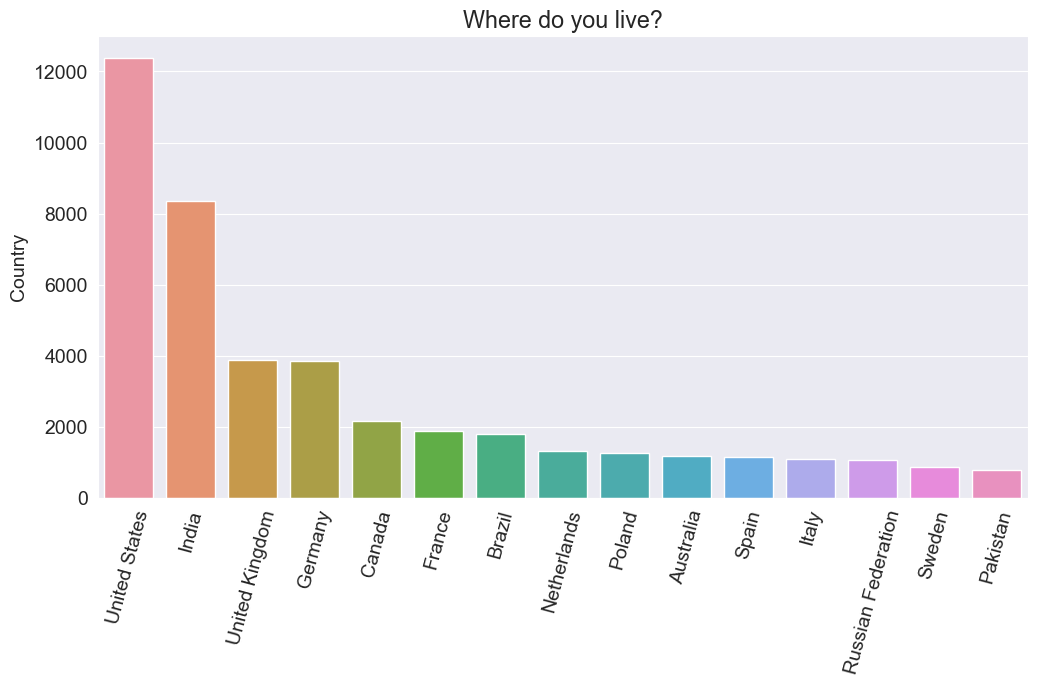

In [30]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema_raw_df.loc['Country','QuestionText'])
sns.barplot(x=top_countries.index, y=top_countries);

# Age

The distribution of respondent's age

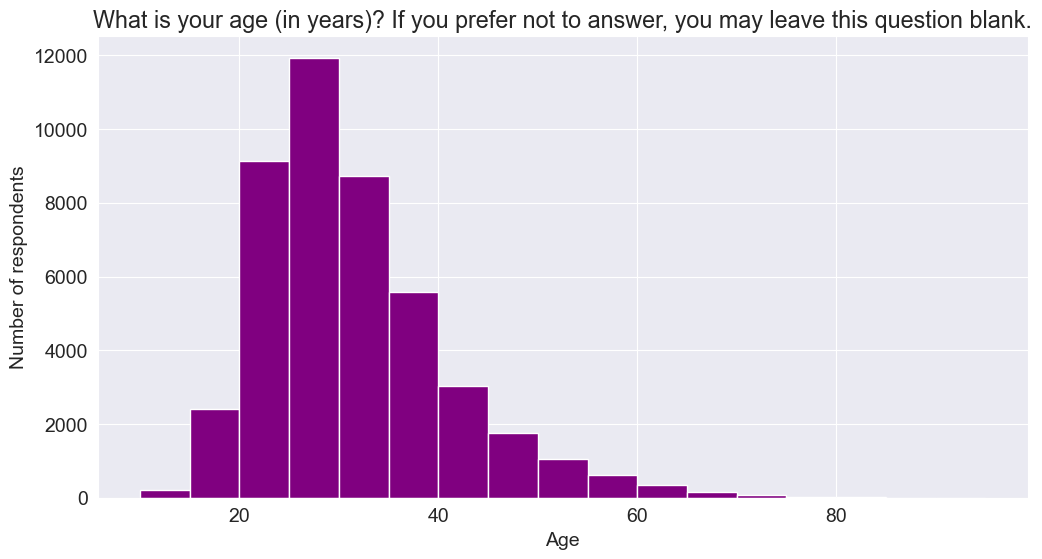

In [31]:
plt.figure(figsize=(12, 6))
plt.title(schema_raw_df.loc['Age','QuestionText'])
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df['Age'], bins=np.arange(10,100,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old

# Gender

distribution of responses for the Gender

In [32]:
schema_raw_df.loc['Gender','QuestionText']

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [33]:
gender_counts = survey_df['Gender'].value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

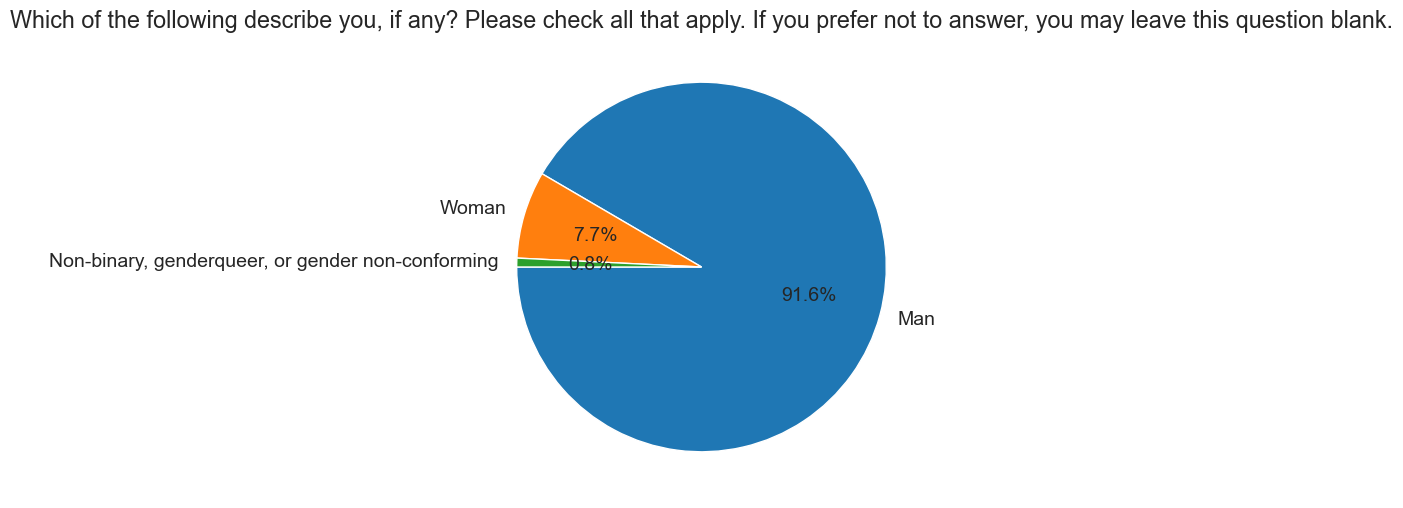

In [34]:
plt.figure(figsize=(12,6))
plt.title(schema_raw_df.loc['Gender','QuestionText'])
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

# Education Level

distribution of responses on basis of their educational background/degree

In [36]:
schema_raw_df.loc['EdLevel','QuestionText']

'Which of the following best describes the highest level of formal education that you’ve completed?'

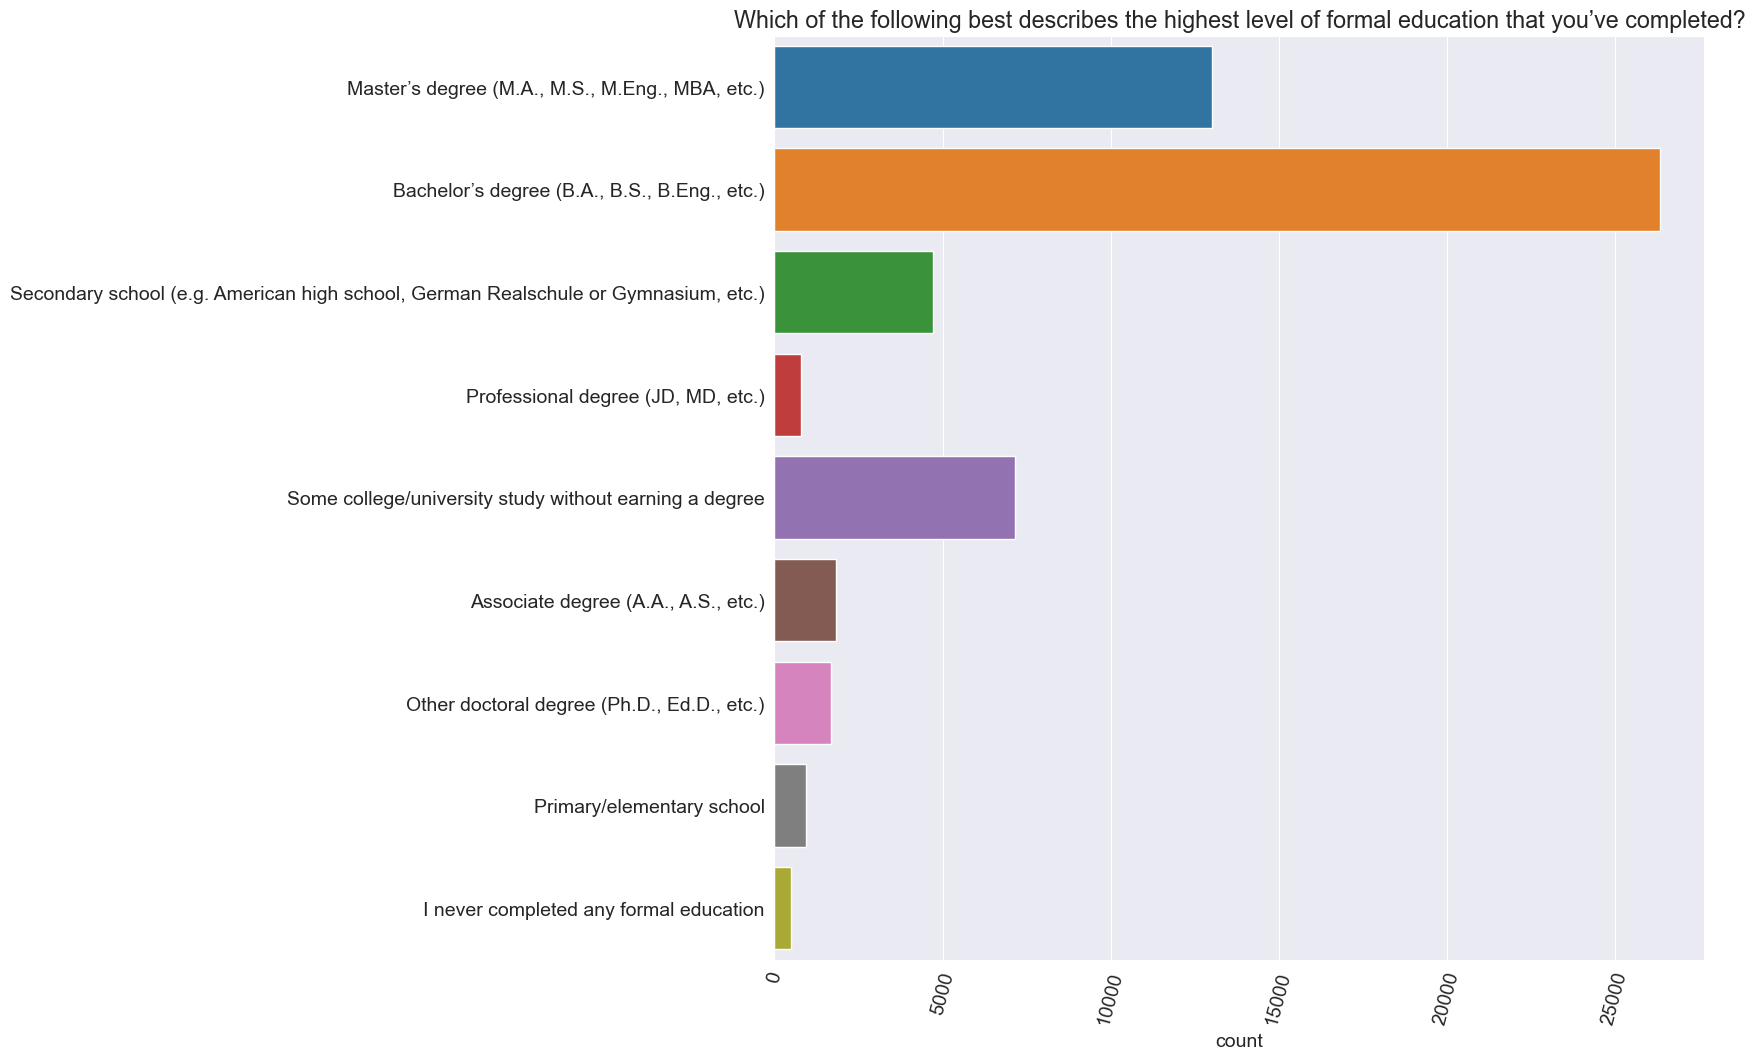

In [37]:
plt.figure(figsize=(12,12))
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema_raw_df.loc['EdLevel','QuestionText'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education

In [38]:
schema_raw_df.loc['UndergradMajor','QuestionText']

'What was your primary field of study?'

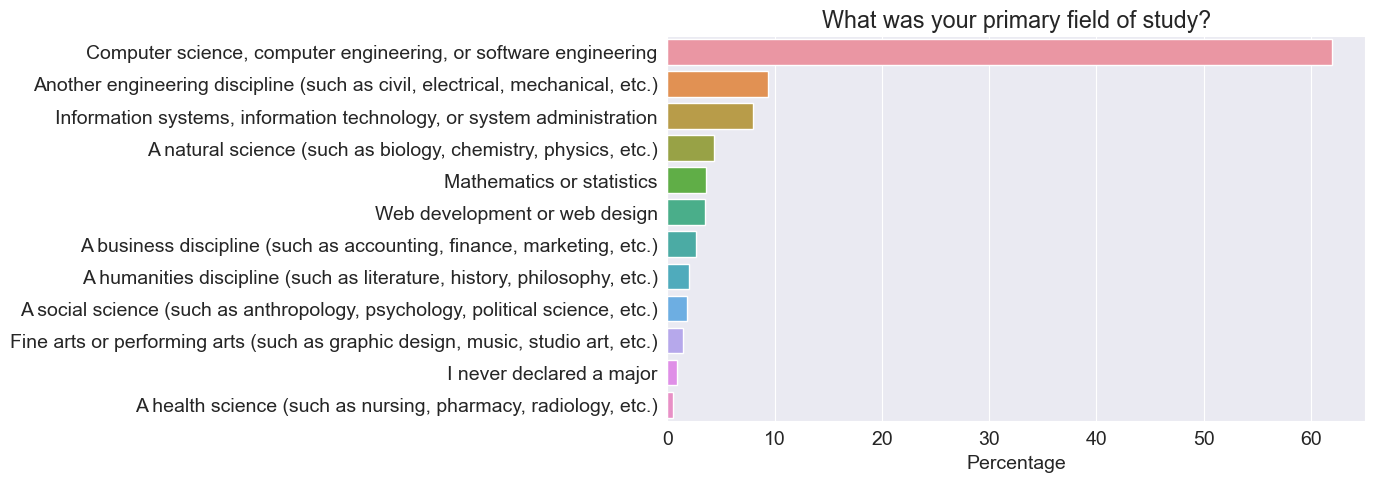

In [39]:
undergrad_pct = survey_df['UndergradMajor'].value_counts() * 100 / survey_df['UndergradMajor'].count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema_raw_df.loc['UndergradMajor','QuestionText'])
plt.ylabel(None);
plt.xlabel('Percentage');

# Employment

In [40]:
schema_raw_df.loc['Employment','QuestionText']

'Which of the following best describes your current employment status?'

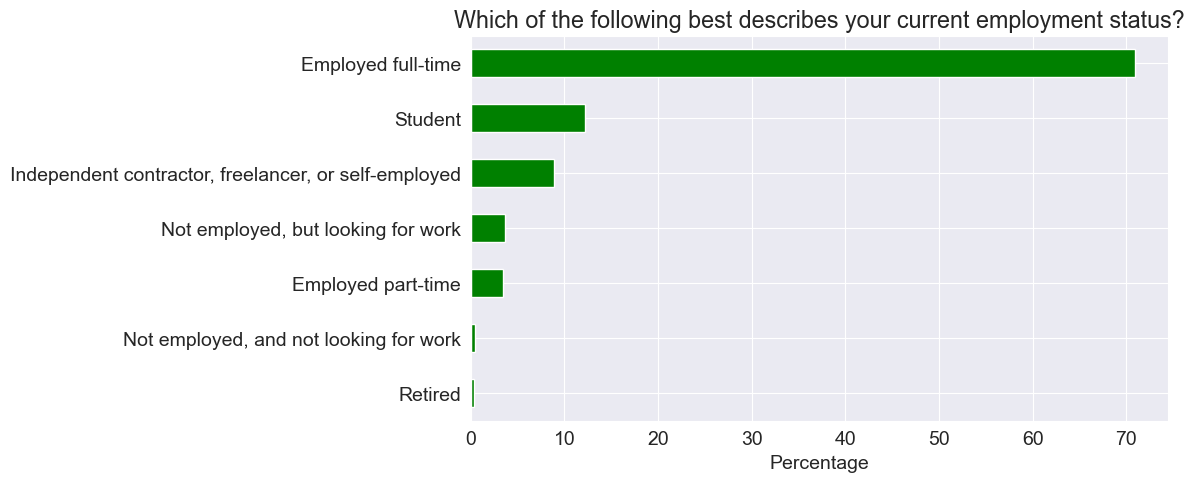

In [41]:
(survey_df['Employment'].value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema_raw_df.loc['Employment','QuestionText'])
plt.xlabel('Percentage');

In [42]:
schema_raw_df.loc['DevType','QuestionText']

'Which of the following describe you? Please select all that apply.'